# Forsøksplanlegging 1: Multippel lineær regresjon
### Prosjektmodul i ISTx1001

Fellesmodulen av ISTx100y avsluttet vi med tre uker om estimering, hypotesetesting og enkel lineær regresjon. I forsøksplanlegging ("design of experiments" / DOE) skal vi bygge videre på dette. 

I dette notatet skal vi se på et kjent eksempel fra fellesmodulen (løpedataene). Vi skal diskutere hvor mange observasjoner vi (minst) må ha for gjøre inferens og vi skal bygge en multippel lineær regresjonsmodell. Underveis skal vi peke på smarte og mindre smarte grep med studie-designet. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import statsmodels.formula.api as smf
from scipy import stats 

In [2]:
df = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/python_felles/garmindata2.csv') # dataene vi skal bruke for regresjon

# Del 1: Enkel lineær regresjon

## Eksempel: Kaloriforbruk 
Vi skal modellere en treningsklokkes rapporte kaloriforbruk på løpeturer med en enkel lineær regresjonsmodell. Kaloriforbruk (i kcal) er responsvariabel ($Y$), mens distansen (i km) på en løpetur er en forklaringsvariabel ($x$). Vi antar at det rapporterte kaloriforbruket for en viss distanse er en normalfordelt størrelse der forventningsverdien er lineær i $x$, beskrevet at regresjonslinja $\beta_0 + \beta_1 x$, og der variasjonen er den samme uansett distanse: 

$$Y|x \sim N(\beta_0 + \beta_1 x, \sigma)$$

Vi antar dermed at for en kjent verdi av distansen $x$, så følger kaloriforbuket en normalfordeling med forventning $\beta_0 + \beta_1 x$ og standardavvik $\sigma$. De tre parameterene $\beta_0$, $\beta_1$ og $\sigma$ er ukjente.

Vi har et datasett bestående av 55 registrerte løpeturer og som vi kan bruke for å estimere $\beta_0$, $\beta_1$ og $\sigma$. Vi kan også visualisere den estimerte regresjonslinja og observasjonene våre i et kryssplott.

In [30]:
modell = smf.ols('Calories~Distance', data=df).fit()
#print(modell.summary()) # skrive ut hele sammendraget fra modelltilpasning, f.eks t-test
#print(modell.params)  # skrive ut bare regresjonslinja

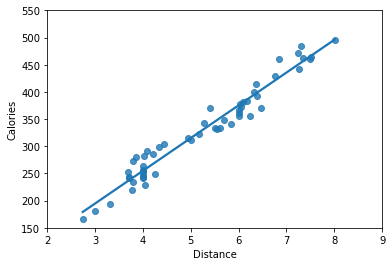

In [16]:
sns.regplot(x='Distance', y='Calories',data = df, ci = None)
plt.xlim(2,9); plt.ylim(150, 550)
plt.show()

Vi observerer at estimatene for skjæringspunktet $\beta_0$ og stigningstallet $\beta_1$ blir (avrundet) $14.2$ og $60.2$. Den estimerte regresjonslinja er derfor $14.2 + 60.2x$. For en fremtidig løpetur på $x=5$ km er dermed estimert forventet kaloriforbruk på $315.2$ kcal. Dersom løpeturen er på $x=6$ km blir estimert forventet kaloriforbuk $375.4$ kcal. Merk tolkningen av stigningstallet $\beta_1$; en endring i kovariaten $x$ på én enhet (1 km) fører til en endring i forventet responsverdi tilsvarende $\beta_1 = 60.2$ (kcal). 

Dersom vi skriver ut hele modellsammendraget (kjør `print(modell.summary())`)ser vi også at $p$-verdien fra en $t$-test på stigningstallet $\beta_1$, der vi tester $H_0: \beta_1 = 0$ mot $H_1: \beta_1 \neq 0$, er mindre enn $0.05$. Dermed kan vi fastslå, ved signifikansnivå $\alpha = 0.05$, at distanse er en signifikant forklaringsvariabel for kaloriforbruk. Dette ser forøvrig helt tydelig fra kryssplottet.

Vi kan også estimere variansen $\sigma^2$ ved å regne ut på summen av kvadrerte avvik fra linja, delt på $n-p$, der $p$ er antall koeffisienter i modellen (her er $p = 2$ fordi vi har koeffisientene $\beta_0$ og $\beta_1$). Standardavviket $\sigma$ estimerer vi ved å ta kvadratroten av den estimerte variansen.

In [20]:
s = np.sqrt(modell.mse_resid)
print(round(s,2))

18.02


### Motivasjon for 2-nivå faktorielle forsøk

Løpedataene fra treningsklokken er såkalt observasjonelle data. Personen som eier klokka har registrert sine treningsøkter, og i etterkant får vi gjøre analyser av dataene. Det finnes ikke noe forsøksdesign som er implementert for nettopp å kunne estimere sammenhengen mellom distanse og kaloriforbruk. 

Forsøksplanlegging dreier seg om å først designe en studie, deretter samle inn data, og til slutt analysere dataene. I design-prosessen er det viktige å gjøre gode valg slik at datainnsamlingen (som kanskje er veldig kostbar / tidkrevende) ikke er bortkastet. 

I den type design vi skal se på i ISTx1001 er det alltid en (kontinuerlig) responsvariabel $Y$ som er av interesse, og vi skal studere ulike forklaringsvariabler (også kalt faktorer) som responsen $Y$ kan være assosiert med. Det spesielle med 2-nivå faktorielle forsøk - som er hovedtemaet vårt i ISTx1001 - er at alle mulige forklaringsvariabler skal studeres på kun 2 nivåer. La oss konkretisere dette ved hjelp av løpedataene våre. 

Tenkt at vi ønsker å studere kaloriforbruk på løpeturer. Distanse er én mulig forklaringsvariabel for kaloriforbruk. Vi får lov å 'bestille' 4 løpeturer og må derfor spesifisere distansen som skal løpes på disse løpeturene. Hva burde vi velge som verdier for $x$?

#### Alternativ 1
Vi bestiller fire løpeturer på ca 5-6 km.

In [8]:
df1 = df.iloc[[28,29,37,44],:]
modell1 = smf.ols('Calories~Distance', data=df1).fit()
#print(modell1.params)
#print(modell1.summary())

#### Alternativ 2
Vi bestiller to løpeturer på ca 4 km og to løpeturer på ca 7 km.

In [29]:
df2 = df.iloc[[2,3,10,32],:]
modell2 = smf.ols('Calories~Distance', data=df2).fit()
#print(modell2.params)
#print(modell2.summary())

Hva tror du er det beste alternativet? Tilpass en enkel lineær regresjonsmodell basert på de to alternativene (df1 og df2) ved å kjøre koden og sammenlign resultatet med modellen som vi fant basert på 55 observasjoner. Hvilket alternativ passer best med "fasiten"?

Vi ser at med alternativ 1 finner vi *ikke* en statistisk signifikant sammenheng mellom distanse og kaloriforbruk ($p = 0.089)$. Med alternativ 2 finner vi en statistisk signifikant sammenheng ($p = 0.005$), og den estimerte regresjonslinja $8.2 + 64.5 x$ er ganske lik den linja vi estimerte fra alle de 55 løpeturene. **Merk 1:** Med bare 4 (godt planlagte) løpeturer får vi omtrent samme resultat som når vi analyserer hele datasettet. **Merk 2:** Med bare 4 observasjoner har vi selvfølgelig mye større usikkerhet i parametermeterestimatene og dermed estimatet av regresjonslinja. Vi får dermed også lavere teststyrke i for å avdekke en signifikant sammenheng mellom $x$ og $Y$ ($\beta_1 \neq 0$). Dette kan du f.eks se ved å lese av den estimerte standardfeilen (`std err`) til $\hat{\beta}_1$ som er $1.799$ i den første modellen (55 observasjoner) og $4.475$ i modellen med 4 observasjoner. 

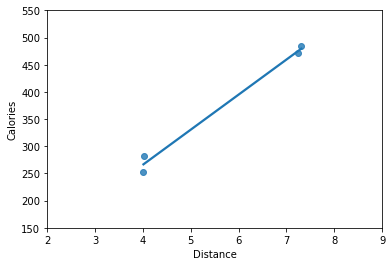

In [41]:
sns.regplot(x='Distance', y='Calories',data = df2, ci = None)
plt.xlim(2,9); plt.ylim(150, 550)
plt.show()

#### Når blir det for få observasjoner?

Hva om vi bare bestilte 2 løpeturer? En kort ($x \approx 4$) og en lang ($x \approx 7$)?

In [12]:
df3 = df.iloc[[2,10],:]
modell3 = smf.ols('Calories~Distance', data=df3).fit()
#print(modell3.params)
#print(modell3.summary())

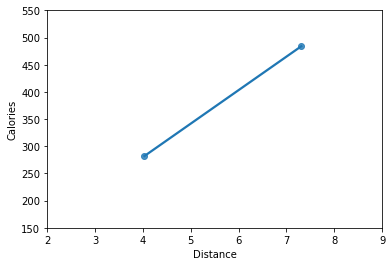

In [13]:
sns.regplot(x='Distance', y='Calories',data = df3, ci = None)
plt.xlim(2,9); plt.ylim(150, 550)
plt.show()

Vi observerer at med kun to løpeturer *kan* vi igjen finne omtrent den samme regresjonslinje som vi så tidligere. Vi kan estimere både skjæringspunkt og stignignstall basert på de to observasjonene våre. Som vi ser i figuren over blir dette en rett linje fra den ene observasjonen vår til den andre. 

Men hva med usikkerhet i parameterestimatene og i linja? Fra disse to prikkene i figuren, kan du se for deg andre rette linjer som kunne passet med dataene? 

Dersom vi ønsket å estimere $\sigma^2$ (variansen) for denne modellen ville vi brukt formelen $s^2 = \frac{1}{n-2} \sum_{i=1}^2 (y_i - \hat{y}_i)^2$. I dette tilfellet blir $s^2 = \frac{0}{0}$, som er udefinert. Uten et estimat på $\sigma$ kan vi ikke estimere usikkerheten i estimatene $\hat{\beta}_0$ og $\hat{\beta}_1$, og dermed kan vi heller ikke gjennomføre hypotesetester, for eksempel på $\beta_1$.

Skriv ut `modell3.summary()` for å se hva modelltilpasningen i Python gir oss i dette tilfellet. 

In [46]:
#print(modell3.summary())

## Del 1 kort oppsummert

- Ved å gjøre smarte design-valg for en valgt forklaringsvariabel $x$ kan vi avdekke en statistisk signifikant sammenheng mellom forklaringsvariabelen og responsvariabelen basert på relativt få observasjoner. 
- Med kun to observasjoner kan vi estimere to modellparametere (skjæringspunkt og stigningstall), men vi har ikke nok informasjon i dataene til å estimere varians. Dermed kan vi heller ikke utføre hypotesetester eller beregne konfidensintervaller.

#### Merk

- I 2-nivå faktorielle forsøk skal vi se på flere typer forklaringsvariabler. Dersom en forklaringsvariabel $x$ kan ta mange ulike verdier må vi selv bestemme oss for 2 nivåer som vi kaller lavt nivå og høyt nivå. I vårt eksempel ville vi satt lavt nivå til å være 4 km og høyt nivå til å være 7 km. Dersom en faktor bare kan ta to ulike verdier i utgangspunktet, for eksempel natt og dag, så har vi automatisk et lavt og et høyt nivå.
- Selv om vi kan tilpasse rette linjer med relativt få observasjoner (f.eks 2 og 4 i eksempelet over) vil modelltilpasningen bli bedre av å samle inn mer data. Når vi designer forsøk må vi gjøre en avveiing mellom hvor god modelltilpasning vi ønsker og hvor kostbart det vil være å gjennomføre forsøk. Små effekter er vanskeligere å avdekke med få observasjoner enn det store effekter er. 

# Del 2: Multippel lineær regresjon

I Del 1 har vi sett at distanse er en god forklaringvariabel for kaloriforbruk, men det er rimelig å tro at også andre faktorer påvirker responsvariabelen. Hva med for eksempel høydemeter, hastighet, temperatur eller puls? Vi kan utvide en enkel lineær regresjonsmodell ved å legge til flere forklaringsvariabler. Vi skal her studere
$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon, \, \varepsilon \sim N(0, \sigma)$$
der $Y$ representerer kaloriforbuk, $x_1$ representerer distanse (i km) og $x_2$ representerer høydemeter. Koeffisienten $\beta_1$ representerer forventet økning i kaloriforbuk dersom distansen øker med 1 km (én enhet) mens andre forklaringsvariabler holdes konstante. Koeffisienten $\beta_2$ representerer forventet økning i kaloriforbruk dersom antall høydemeter øker med 1 meter mens andre forklaringsvariabler holdes konstante. 

Vi starter med å tilpasse en slik regresjonsmodell til de dataene vi har tilgjengelige: 

In [15]:
modell_ny = smf.ols('Calories~Distance+Elev_Gain', data=df).fit()
#print(modell_ny.summary())
print(modell_ny.params)

Intercept     7.482388
Distance     56.223874
Elev_Gain     0.353625
dtype: float64


Fra modellutskriften ser vi at koeffisientene for både distanse ($\beta_1$, 'Distance') og høydemeter ($\beta_2$, 'Elev_Gain') er signifikant ulike null ved signifikansnivå $\alpha = 0.05$ ($p$-verdiene er lavere enn 0.05). Dette indikerer at både distanse og høydemeter er assosiert med responsvariabelen kaloriforbruk. Den estimerte regresjonsinja blir $7.5 + 56.2 x_1 + 0.4 x_2$.

## Hvordan tolker vi modellen?

Nå som vi har tilpasset en multippel lineær regresjonsmodell må vi prøve å forstå hva modellen forteller oss. Estimatene for $\beta_0$, $\beta_1$ og $\beta_2$ er henholdsvis 7.5, 56.2 og 0.4. Hvordan skal vi tolke dette? Vi kan se for oss at vi løper på en friidrettsbane. Der vil antall høydemeter på treningsturen alltid være $x_2 = 0$ fordi banen er helt flat. I så fall er estimert forventet kaloriforbruk ved $x_1 = 5$ km (12.5 runder) $7.5 + 56.2\cdot 5 = 288.5$ kcal. For en $x = 6$ km økt på bane (15 runder) øker estimert forventet kaloriforbuk med $\hat{\beta}_2 = 56.2$ kcal. Generelt har vi at når totalt antall høydemeter holdes fast ($x_2$ holdes til tallverdi, f.eks 0, 5 eller 10 meter) så vil "effekten" av å øke distansen med $1$ km være $56.2$ kcal. Dersom distansen holdes fast, men antall høydemeter øker med en enhet (en meter), så er "effekten" på estimert forventet kaloriforbuk en økning på 0.4 kcal. 


#### Problem 1: Kan vi snakke om effekten av $x_1$ og $x_2$ hver for seg?
Gir det mening å tenke seg at antall høydemeter holdes konstant mens distansen økes? Og kan vi holde distansen konstant men øke antall høydemeter? Ja, i prinsippet kan vi designe en studie der dette oppfylles. Men i de tilgjengelige dataene har vi ikke designet studien på forhånd for å sikre at distanse og høydemeter er ukorrelerte. Se på kryssplottet av høydemeter mot distanse. Det finnes f.eks ingen lange løpeturer (8 km) uten stigning, og det finnes ingen korte løpeturer (3 km) med mye stigning. Dersom vi nå setter antall høydemeter til å være 0 (flat løype), så *ekstrapolerer* vi utenfor det observerte området dersom vi estimerer at effekten av å øke fra 7 til 8 km er 56.2 kcal.



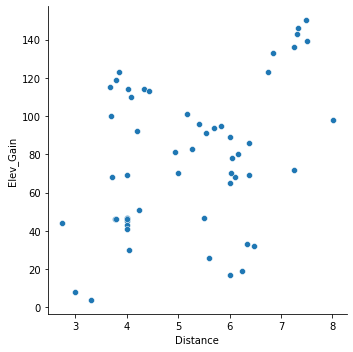

In [ ]:
sns.relplot(x="Distance", y="Elev_Gain",data = df)
plt.show()

#### Problem 2: Hvordan sammenligne $\hat{\beta}_1$ og $\hat{\beta}_2$?
De to estimatene $\hat{\beta}_1$ og $\hat{\beta}_2$ representerer effekten av å øke den tilhørende forklaringsvariabelen ($x_1$ eller $x_2$) med én enhet. En enhet i distanse er 1 km, og enhet i antall høydemeter er 1 m. Effektestimatene er henholdsvis $56.2$ kcal og $0.4 $kcal. Dette er vidt forskjellige numeriske størrelser, og stigning ser ut til å ha en forsvinnende liten effekt på kaloriforbruk sammenlignet med distansen. Men er 1 km og 1 høydemeter sammenlignbare enheter? Kanskje burde en økning på 1 km sammenlignes med en økning i 20 høydemeter? I så fall bør vi sammenligne $56.2$ kcal mot $0.4 \cdot 20 = 8$ kcal. Med mer sammenlignbare enheter virker distanse å være en mye viktigere forklaringsvariabel for kaloriforbruk enn høydemeter. Merk at det sjelden finnes et riktig valg av enheter, vi må bruke vår kjennskap til situasjonen for å bestemme hva som er et rimelig sammenligningsgrunnlag. 

#### Problem 3: Er en høydemeter alltid en høydemeter?
I regresjonsmodellen vår har vi en underliggende antagelse om at en enhets økning i $x_1$ fører til en økning $\beta_1$ i $\text{E}(Y)$, for ethvert nivå av $x_2$. Men kan en økning i $x_1$ ha en større effekt når $x_2$ er på et høyt nivå, sammelignet med når $x_2$ er på et lavt nivå? Vi lurer altså på om verdien av den ene forklaringsvariabelen *modifiserer* effekten av den andre. I så fall har vi det som kalles et samspill eller en interaksjon. 

Kanskje har en økning i antall høydemeter en større påvirkning på kaloriforbruk på en lang løpetur enn det har på en kort tur? Eller motsatt? Dersom vi tror at effekten av en variabel kan påvirkes av nivået av en annen variabel kan vi inkludere et interaksjonsledd i modellen: 

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{12} x_1 x_2 + \varepsilon $$

Vi ganger sammen variablene $x_1$ og $x_2$ og setter en ny parameter $\beta_{12}$ foran dette produktet. Modellen vår har nå 4 parametere: $\beta_0$, $\beta_1$, $\beta_2$, $\beta_{12}$ og $\sigma$. Dersom $\beta_{12}$ estimeres til å være omtrent lik null så har vi ingen bevis på at et såkalt samspill (også kalt interaksjon) er tilstede. På samme måte som tidligere kan vi benytte en $t$-test for å teste om $\beta_{12}$ er signifikant ulik null. 

Under har vi tilpasset en multippel lineær regresjonsmodell med et interaksjonsledd.

In [86]:
modell_samspill = smf.ols('Calories~Distance + Elev_Gain + Distance*Elev_Gain', data=df).fit()
#modell_samspill.summary()

Ifølge modellutskriften er interaksjonsleddet $x_1 x_2$ signifikant ulikt null ved signifikansnivå $\alpha = 0.05$ ($p$-verdien er $0.03$, som er mindre enn $0.05$). Men selv om interaksjonen er statistisk signifikant bør vi undersøke om den er praktisk relevant. 

Figuren under viser estimert lineær sammenheng mellom distanse og kalorier for en flat løype ($x_2 = 10$ høydemeter) og for en kupert løype ($x_2 = 140$). Stigningstallet til den oransje linja (kupert løpetur) er noe lavere enn den blå linja (flate løpeturer). Modellen predikerer dermed at desto lengre distanse, desto mindre effekt har høydemeter på kaloriforbruk. Ved fravær av samspill ville de to linjene vært helt parallelle. Men, selv om samspillet er statistisk signifikant bør vi nok her konkludere med at samspillseffekten er neglisjerbar. Vi foretrekker en enklere modell uten samspill. 

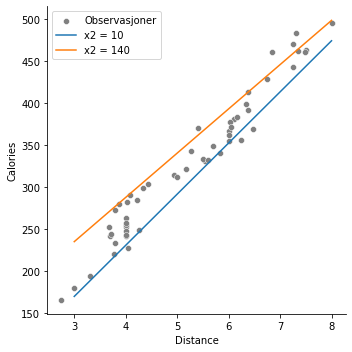

In [85]:
new_X1_values = np.linspace(3, 8, 100)
d1 = {'Distance': new_X1_values, 'Calories': modell_samspill.predict(exog = dict(Distance = new_X1_values, Elev_Gain = np.repeat(10, 100)))}
d2 = {'Distance': new_X1_values, 'Calories': modell_samspill.predict(exog = dict(Distance = new_X1_values, Elev_Gain = np.repeat(140, 100)))}
sns.relplot(x="Distance", y="Calories",data = df, label="Observasjoner", color = "grey")
sns.lineplot(x='Distance', y='Calories', data = d1, label = "x2 = 10")
sns.lineplot(x='Distance', y='Calories', data = d2, label = "x2 = 140")
plt.show()

*Merk:* Problem 3 kan virke veldig likt Problem 1. Forskjellen er at Problem 1 handler om i hvilket område av verdimengden for $x_1$ og $x_2$ vi har data; dette et rent teknisk problem og handlet om ekstrapolering. Problem 3 handler om den faktiske prosessen vi observerer (f.eks en biologisk, kjemisk, medisinsk, eller fysisk prosess).

## Del 2 kort oppsummert

Denne regresjonsanalysen ble utført basert på observasjonelle data, ikke fra en planlagt studie. Dermed har vi noen svakheter i modellen. Estimatet på effekten av $x_1$ mens $x_2$ holdes konstant vil for noen kombinasjoner av $x_1$ og $x_2$ medføre at vi ekstrapolerer utenfor det observerte området. På grunn av ulike enheter i $x_1$ og $x_2$ er parameterestimatene for $\beta_1$ og $\beta_2$ ikke direkte sammenlignbare. 

Vi har også sett at et mindre antall (her 4) "smart utvalgte" observasjoner var nok for å finne samme omsent samme regresjonslinje som vi finner med 55 observasjoner. Denne innsikten kan vi utnytte i en senere designprosess. 

I et to-nivå faktorielt ville vi "bestilt" 4 typer løpeturer der joggeren skal jogge:
1. Kort og flatt  
2. Langt og flatt 
3. Kort og kupert 
4. Langt og kupert 

Vi ser altså for oss to nivåer for hver av de to faktorene ($x_1$ og $x_2$), og vi vil gjøre målinger for alle de fire ($2^2$) faktorkombinasjonene.

Vi må nødvendigvis definere realistiske og gjennomførbare verdier for "kort" og "langt" og "flatt" og "kupert". I tillegg burde løperen passe på at alle andre variabler holdes like (sko, klær, vær, dagsform, osv). Dersom de fire løpeturene gjentas får vi et større datamateriale (med 8, 12, 16 osv observasjoner av kaloriforbruk, og vi får like mange observasjoner per faktorkombinasjon). Med et slikt design "løser" vi problem 1 og 2 over. Problem 3 derimot, det at det kan finnes samspillseffekter, må vi uansett utforske ved å inkludere samspill i regresjonsmodellen. 